In [126]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(12456)

# Direct measurement

Consider an experiment where have a signal with some dependence on a control variable,

$$x = H \ast u_1$$

In [170]:
N = 1e6
fs = 500e6
fnyq = fs /2
tau = 100e-6
tau2 = tau * 3
dt = 1 / fs
t0 = -1e-3
t = np.arange(N)*dt + t0
t_ms = t * 1e3

u = np.where(t >= 0., 1., 0)
u_norm = np.where(t >= 0., 1, 0) 
H_b, H_a = signal.butter(1, 1/(2*np.pi*tau*fnyq))
H_b2, H_a2 = signal.butter(1, 1/(2*np.pi*tau2*fnyq))
D_b, D_a = signal.butter(1, 10e3/fnyq)
x = signal.lfilter(H_b, H_a, u)
yn = np.random.randn(N)
yn2 = np.random.randn(N)
x2 = signal.lfilter(H_b2, H_a2, u)
y = signal.lfilter(D_b, D_a, x + yn)
y2 = signal.lfilter(D_b, D_a, x2 + yn2)

/Users/ryandwyer/anaconda/envs/1605-phasekick/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ryandwyer/anaconda/envs/1605-phasekick/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


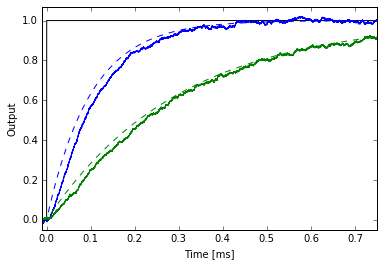

In [171]:
plt.plot(t_ms, u_norm, 'k', label="$u_1$")
plt.plot(t_ms, x, 'b--', label="x")
plt.plot(t_ms, y, 'b-', label='y')
plt.plot(t_ms, x2, 'g--')
plt.plot(t_ms, y2, 'g-')
plt.ylim(-0.05, 1.07)
plt.xlim(-0.01, 0.75)
plt.xlabel("Time [ms]")
plt.ylabel("Output")

What happens if we use a 1 µs time constant?

In [172]:
tau = 0.1e-6
tau2 = tau * 3

t_us = t_ms * 1e3

u = np.where(t >= 0., 1., 0)
u_norm = np.where(t >= 0., 1, 0) 
H_b, H_a = signal.butter(1, 1/(2*np.pi*tau*fnyq))
H_b2, H_a2 = signal.butter(1, 1/(2*np.pi*tau2*fnyq))
D_b, D_a = signal.butter(1, 10e3/fnyq)
x = signal.lfilter(H_b, H_a, u)
x2 = signal.lfilter(H_b2, H_a2, u)
y = signal.lfilter(D_b, D_a, x + yn)
y2 = signal.lfilter(D_b, D_a, x2 + yn2)

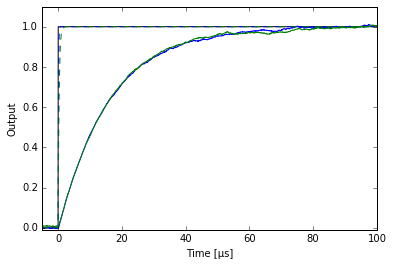

In [173]:
plt.plot(t_us[::10], u_norm[::10], 'k', label="$u_1$")
plt.plot(t_us[::10], x[::10], 'b--', label="x")
plt.plot(t_us[::10], y[::10], 'b-', label='y')
plt.plot(t_us[::10], x2[::10], 'g--', label="x")
plt.plot(t_us[::10], y2[::10], 'g-', label='y')
plt.ylim(-0.01, 1.1)
plt.xlim(-5, 100)
plt.xlabel(u"Time [µs]")
plt.ylabel("Output")

All we see are the detector dynamics.

# Autocorrelation techniques

- For a linear system, we see nothing else.

    $$
    y = H \ast u_1 + k u_2
    $$

- For any non-linear system, we see a low-frequency autocorrelation signal.
    
    $$
    y = (H \ast u_1) u_2
    $$

In [185]:
tau = 0.1e-6
tau2 = tau * 3

t_us = t_ms * 1e3

u = np.where(t >= 0., (signal.square(t*100e3)+1)/2, 0)

H_b, H_a = signal.butter(1, 1/(2*np.pi*tau*fnyq))
H_b2, H_a2 = signal.butter(1, 1/(2*np.pi*tau2*fnyq))
D_b, D_a = signal.butter(1, 10e3/fnyq)
x = signal.lfilter(H_b, H_a, u)
x2 = signal.lfilter(H_b2, H_a2, u)
y = signal.lfilter(D_b, D_a, x + yn)
y2 = signal.lfilter(D_b, D_a, x2 + yn2)

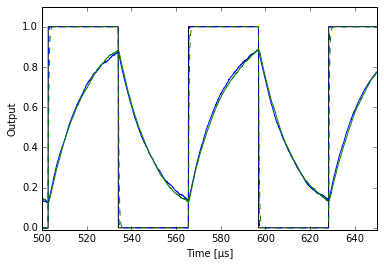

In [193]:
plt.plot(t_us[::10], u[::10], 'k', label="$u_1$")
plt.plot(t_us[::10], x[::10], 'b--', label="x")
plt.plot(t_us[::10], y[::10], 'b-', label='y')
plt.plot(t_us[::10], x2[::10], 'g--', label="x")
plt.plot(t_us[::10], y2[::10], 'g-', label='y')
plt.ylim(-0.01, 1.1)
plt.xlim(500, 650)
plt.xlabel(u"Time [µs]")
plt.ylabel("Output")

In [231]:
u1 = np.where(t >= 0., (signal.square(t*10e6, duty=0.1)+1)/2, 0)
u2 = np.where(t >= 0., (signal.square(t*10e6 - 0.3, duty=0.1)+1)/2, 0)

(-0.01, 1.5)

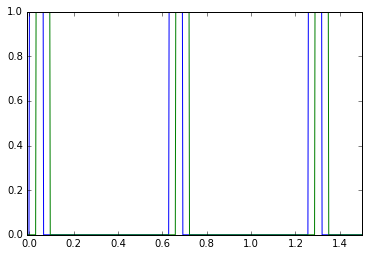

In [232]:
plt.plot(t_us, u1)
plt.plot(t_us, u2)
plt.xlim(-0.01, 1.5)